#### 1. Import libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Load puzzles from lichess.

In [2]:
df = pd.read_csv('../data/puzzles/lichess_db_puzzle.csv.zst', compression='zstd')
df.columns = df.columns.str.lower()
df = df[['fen', 'moves', 'rating']]
df['moves_list'] = df['moves'].str.split(' ')

#### 3. Split puzzles into elo bins.

In [3]:
df['rating_cut'] = pd.cut(df.rating, [0, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 10000])
df_sample = (
    df.groupby('rating_cut', group_keys=False, observed=True)
      .sample(n=100, replace=False, random_state=2001)
)

In [4]:
df_sample['num_of_moves'] = df_sample.moves_list.apply(lambda x: int(len(x)/2))

#### 4. Small EDA.

In [5]:
df_sample.sample(10, random_state=2001)

,fen,moves,rating,moves_list,rating_cut,num_of_moves
3223659,8/4b1k1/4b2p/1p1r2pK/8/2N3P1/5R1P/5B2 b - - 5 46,e6f7 f2f7 g7f7 c3d5,1228,"[e6f7, f2f7, g7f7, c3d5]","(1000, 1250]",2
1655144,rn4k1/ppp3pp/4p1q1/3pP3/3PbQ2/P6N/1PP1B1PP/R5K...,a1f1 g6g2,481,"[a1f1, g6g2]","(0, 500]",1
678435,5rk1/5ppp/p3P3/1p6/8/4Q2P/PPq3P1/5RK1 b - - 0 24,c2c4 e6f7 c4f7 f1f7,1143,"[c2c4, e6f7, c4f7, f1f7]","(1000, 1250]",2
5140058,2rqrk2/8/1p6/4PQ2/p2P4/PN4P1/1P2P2P/6K1 b - - ...,f8e7 f5f6 e7d7 f6d6,1146,"[f8e7, f5f6, e7d7, f6d6]","(1000, 1250]",2
1296366,8/4ppkp/6p1/8/P7/1P3qP1/3K4/2Q5 b - - 0 44,f3b3 c1c3 b3c3 d2c3,1029,"[f3b3, c1c3, b3c3, d2c3]","(1000, 1250]",2
5473290,5k2/5pp1/1r5p/Rp2PN2/2b1n3/4K3/6P1/8 b - - 9 39,e4c3 a5a8 b6b8 a8b8,521,"[e4c3, a5a8, b6b8, a8b8]","(500, 750]",2
5468806,r4r1k/2p3bp/2Pp2p1/pP1Pp3/4Qnq1/P1N1B3/5PPP/R4...,f2f3 g4g2,1049,"[f2f3, g4g2]","(1000, 1250]",1
4913807,5Q2/ppr4p/1q2B1p1/5p1k/6P1/1P5P/P4P2/6K1 b - -...,f5g4 e6g4 h5g5 g4d1 c7f7 f8f7,2792,"[f5g4, e6g4, h5g5, g4d1, c7f7, f8f7]","(2750, 3000]",3
4145128,r1bq1rk1/p3bpp1/2p1pn1p/3p4/2P1P2B/P1N5/1PQ2PP...,d8a5 e4e5 g7g5 e5f6 e7f6 h4g3,1834,"[d8a5, e4e5, g7g5, e5f6, e7f6, h4g3]","(1750, 2000]",3
3934723,R7/5pkp/5Np1/6P1/3P4/2P1nP1K/1r3Q1P/2q5 b - - ...,b2f2 a8g8,701,"[b2f2, a8g8]","(500, 750]",1


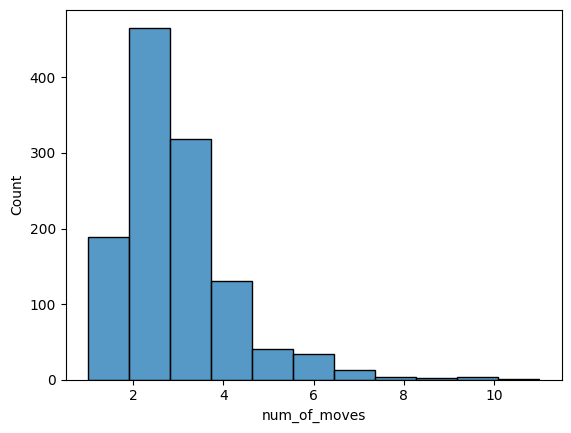

In [6]:
sns.histplot(data=df_sample, x='num_of_moves', bins=11)
plt.show()

In [7]:
(df_sample.num_of_moves.value_counts(normalize=True) * 100).sort_index()

# most puzzles requires 2-3 moves from engine

num_of_moves
1     15.750000
2     38.833333
3     26.583333
4     10.833333
5      3.333333
6      2.833333
7      1.083333
8      0.250000
9      0.166667
10     0.250000
11     0.083333
Name: proportion, dtype: float64

#### 5. Save frame of test puzzles into feather file.

In [ ]:
df_sample[['fen', 'moves', 'rating', 'num_of_moves']].to_feather('../data/puzzles/test_puzzles.feather')
# don't save 'moves_list' because it's a column of lists and causes problems when reading